Import Libraries

In [2]:
import numpy as np
import pandas as pd
import importlib
import AdjMeta as data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
import time
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, balanced_accuracy_score, roc_curve, auc
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
importlib.reload(data)

<module 'AdjMeta' from 'd:\\CSE Batch58\\4th year\\1st term\\1st term\\1. Machine Learning\\10. Project\\Final Project\\python\\AdjMeta.py'>

Prepare Folders and Load the Dataset

In [4]:
original_dataset_dir = r'D:\CSE Batch58\4th year\1st term\1st term\1. Machine Learning\10. Project\Final Project\Original CSVs'
concatenated_dataset_dir = r'D:\CSE Batch58\4th year\1st term\1st term\1. Machine Learning\10. Project\Final Project\Conacatenated Dataframe\concatenated_df.csv'
output_train_file = r'D:\CSE Batch58\4th year\1st term\1st term\1. Machine Learning\10. Project\Final Project\train Dataframe\train_df.csv'
output_test_file = r'D:\CSE Batch58\4th year\1st term\1st term\1. Machine Learning\10. Project\Final Project\test Dataframe\test_df.csv'

In [5]:
processed_datasets = data.process_csv_files(original_dataset_dir)
data.concatenate_data(processed_datasets, concatenated_dataset_dir)
csv_concatenator = pd.read_csv(concatenated_dataset_dir)

Processing D:\CSE Batch58\4th year\1st term\1st term\1. Machine Learning\10. Project\Final Project\Original CSVs\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Pack

In [7]:
train_df, test_df = data.split_train_test(csv_concatenator)
data.save_dataframes(train_df, test_df, output_train_file, output_test_file)
csv_concatenator_train = pd.read_csv(output_train_file)
csv_concatenator_test = pd.read_csv(output_test_file)

Train data saved to D:\CSE Batch58\4th year\1st term\1st term\1. Machine Learning\10. Project\Final Project\train Dataframe/train.csv
Test data saved to D:\CSE Batch58\4th year\1st term\1st term\1. Machine Learning\10. Project\Final Project\test Dataframe/test.csv


Recognize the train Dataset:

In [8]:
headers = list(csv_concatenator_train.columns.values)
print("Headers: ", headers, "\n")

print("Number of features: ", len(headers) - 1, "\n")
print(csv_concatenator_train.head(), "\n")
print(len(csv_concatenator_train), "\n")

Headers:  ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE 

In [9]:
print("Train Dataset description \n\n", csv_concatenator_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264594 entries, 0 to 2264593
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [10]:
print("Train Dataset description \n\n", csv_concatenator_train.describe().T)

Train Dataset description 

                                  count          mean           std   min  \
Destination Port             2264594.0  8.063157e+03  1.827532e+04   0.0   
Flow Duration                2264594.0  1.478583e+07  3.365871e+07 -13.0   
Total Fwd Packets            2264594.0  9.606270e+00  7.752385e+02   1.0   
Total Backward Packets       2264594.0  1.070873e+01  1.030100e+03   0.0   
Total Length of Fwd Packets  2264594.0  5.461874e+02  6.560445e+03   0.0   
...                                ...           ...           ...   ...   
Active Min                   2264594.0  5.837778e+04  5.801859e+05   0.0   
Idle Mean                    2264594.0  8.309051e+06  2.361845e+07   0.0   
Idle Std                     2264594.0  5.034238e+05  4.599247e+06   0.0   
Idle Max                     2264594.0  8.688360e+06  2.435459e+07   0.0   
Idle Min                     2264594.0  7.913287e+06  2.335184e+07   0.0   

                               25%      50%         75%   

In [11]:
# count number of unique classes in the 'Label' column
num_classes = csv_concatenator_train['Label'].nunique()

# Get the count of each class
class_counts = csv_concatenator_train['Label'].value_counts()

print(f"Number of unique classes: {num_classes}")
print("Class counts: ", class_counts, sep='\n')

Number of unique classes: 15
Class counts: 
Label
BENIGN                        1818663
DoS Hulk                       184587
PortScan                       127219
DDoS                           102444
DoS GoldenEye                    8219
FTP-Patator                      6326
SSH-Patator                      4724
DoS slowloris                    4623
DoS Slowhttptest                 4427
Bot                              1576
Web Attack � Brute Force         1199
Web Attack � XSS                  533
Infiltration                       31
Web Attack � Sql Injection         14
Heartbleed                          9
Name: count, dtype: int64


In [12]:
csv_concatenator_train['Label'] = csv_concatenator_train['Label'].replace({
        'Web Attack � Brute Force': 'Brute Force',
        'Web Attack � XSS': 'XSS',
        'Web Attack � Sql Injection': 'Sql Injection'
    })

In [13]:
# count number of unique classes in the 'Label' column
num_classes = csv_concatenator_train['Label'].nunique()

# Get the count of each class
class_counts = csv_concatenator_train['Label'].value_counts()

print(f"Number of unique classes: {num_classes}")
print("Class counts: ", class_counts, sep='\n')

Number of unique classes: 15
Class counts: 
Label
BENIGN              1818663
DoS Hulk             184587
PortScan             127219
DDoS                 102444
DoS GoldenEye          8219
FTP-Patator            6326
SSH-Patator            4724
DoS slowloris          4623
DoS Slowhttptest       4427
Bot                    1576
Brute Force            1199
XSS                     533
Infiltration             31
Sql Injection            14
Heartbleed                9
Name: count, dtype: int64


In [14]:
null_counts = csv_concatenator_train.isnull().sum().sum()
print("Null values in all dataset: ", null_counts)

Null values in all dataset:  1072


In [15]:
# Check for columns with null values and print only those columns
has_null = csv_concatenator_train.isnull().any()
null_columns = has_null[has_null].index.tolist()

print("Columns with null values: ", null_columns)

Columns with null values:  ['Flow Bytes/s']


In [16]:
# Fill null values with the mean of the column
mean_value = csv_concatenator_train['Flow Bytes/s'].mean()
csv_concatenator_train['Flow Bytes/s'].fillna(mean_value, inplace=True)
print(csv_concatenator_train['Flow Bytes/s'].isnull().sum())

0


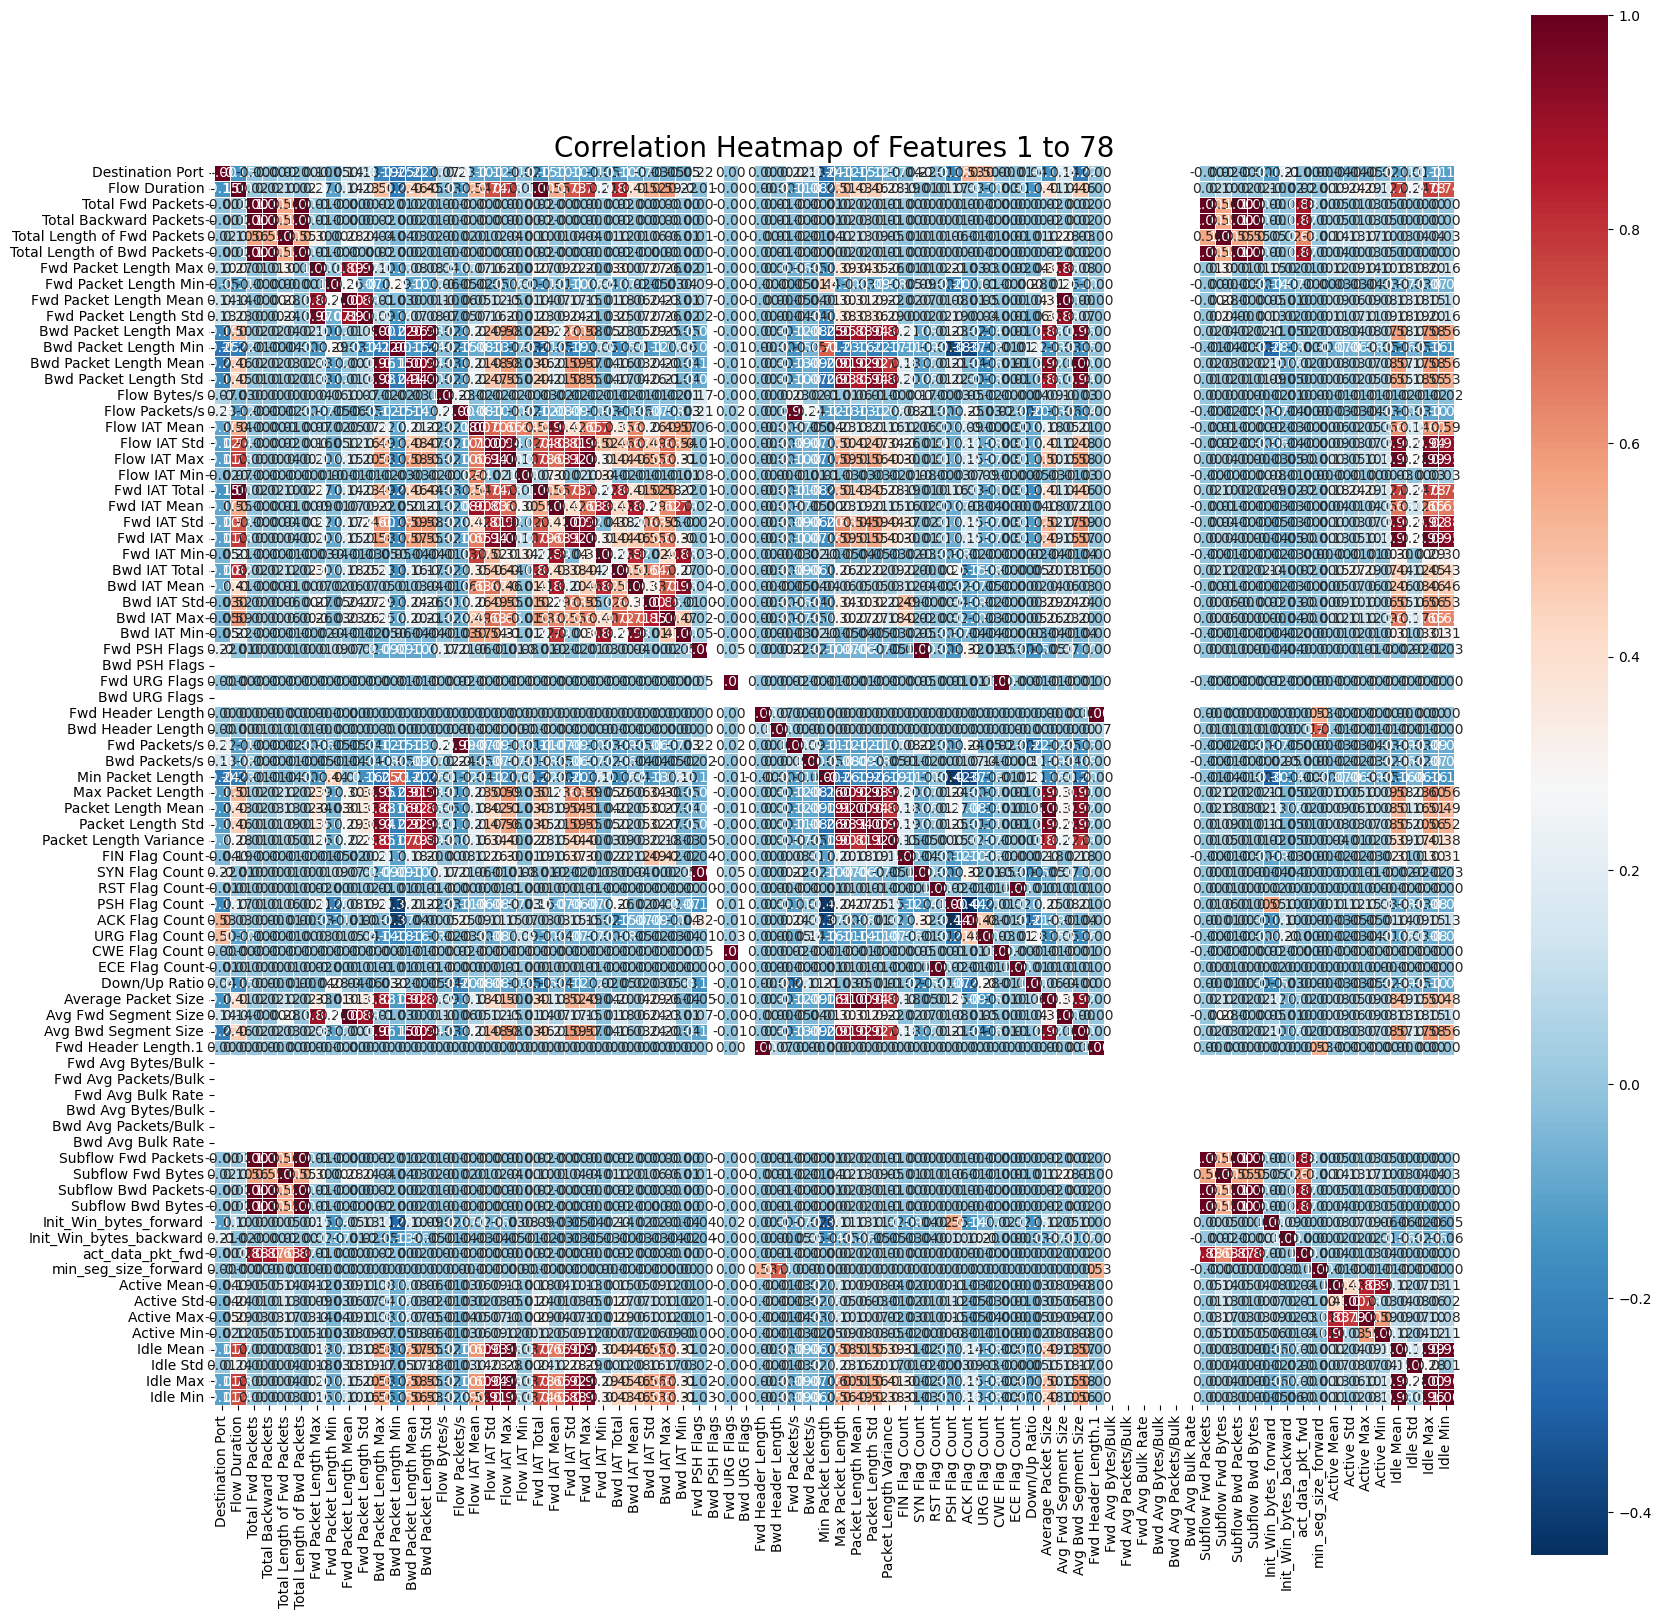

In [17]:
# Drop the 'Label' column
csv_concatenator_train_without_label = csv_concatenator_train.drop(["Label"], axis=1)

# Calculate the correlation matrix
corr = csv_concatenator_train_without_label.corr()

# Function to plot heatmap for a subset of features
def plot_heatmap(corr, start, end):
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr.iloc[start:end, start:end], cmap="RdBu_r", annot=True, fmt=".2f", linewidths=.5, square=True)
    plt.title(f'Correlation Heatmap of Features {start+1} to {end}', fontsize=20)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

# Define the number of features per heatmap
features_per_heatmap = 78

# Plot heatmaps in sections
for i in range(0, len(corr), features_per_heatmap):
    plot_heatmap(corr, i, min(i + features_per_heatmap, len(corr)))

### Training Data pre-processing

In [18]:
Columns_to_drop = ['Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min','Fwd Header Length', 'Label']
X_train = csv_concatenator_train.drop(columns=Columns_to_drop)
y_train = csv_concatenator_train['Label']

In [19]:
print(X_train.shape)

(2264594, 63)


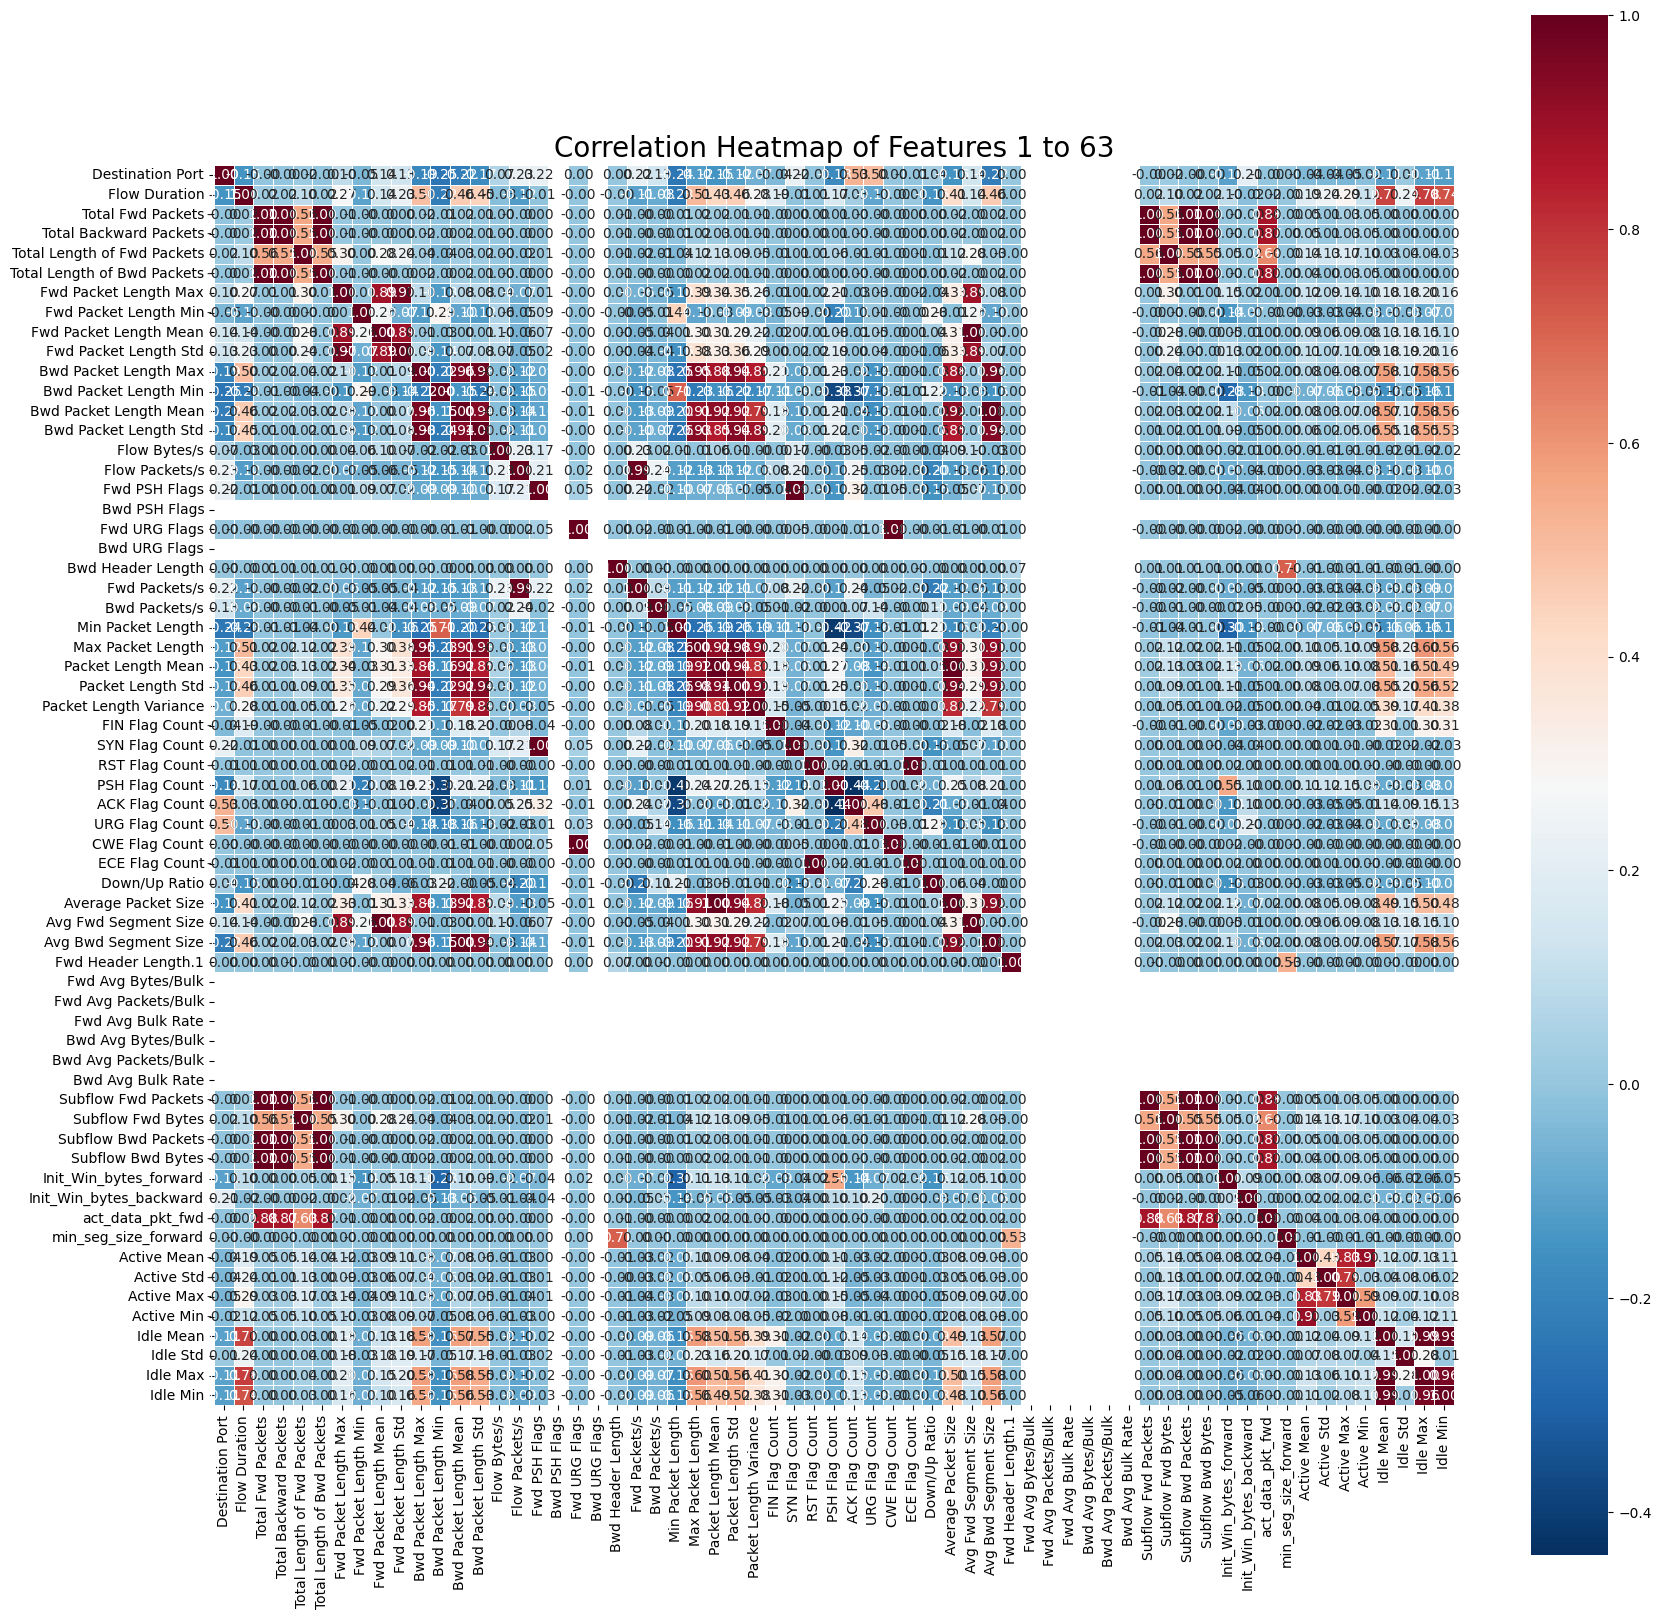

In [20]:
# Calculate the correlation matrix
corr = X_train.corr()

# Function to plot heatmap for a subset of features
def plot_heatmap(corr, start, end):
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr.iloc[start:end, start:end], cmap="RdBu_r", annot=True, fmt=".2f", linewidths=.5, square=True)
    plt.title(f'Correlation Heatmap of Features {start+1} to {end}', fontsize=20)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

# Define the number of features per heatmap
features_per_heatmap = 64

# Plot heatmaps in sections
for i in range(0, len(corr), features_per_heatmap):
    plot_heatmap(corr, i, min(i + features_per_heatmap, len(corr)))

In [24]:
standard_scaler = StandardScaler()
label_encoder = LabelEncoder()

### Trainig Data Scalling

In [25]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)

In [26]:
X_train_scaled = standard_scaler.fit_transform(X_train)
print("StandardScaler applied successfully.")

StandardScaler applied successfully.


### Label Encoding for Training Data

In [27]:
# y is your categorical labels
y_encoded_train = label_encoder.fit_transform(y_train)

print("Original Classes: ", label_encoder.classes_, "\n")
print("Encoded train shape:", y_encoded_train.shape, "\n")

unique_classes_train = np.unique(y_encoded_train)
num_classes = len(unique_classes_train)

print("Classes: ", unique_classes_train)
print("Number of Classes: ", num_classes, "\n")

# Print unique encoded labels with their corresponding original classes
unique_encoded_labels = np.unique(y_encoded_train)
print("Unique Encoded Labels and their Original Classes:")
for encoded_label in unique_encoded_labels:
    original_class = label_encoder.inverse_transform([encoded_label])
    print(f"Encoded Label: {encoded_label}, Original Class: {original_class[0]}")

Original Classes:  ['BENIGN' 'Bot' 'Brute Force' 'DDoS' 'DoS GoldenEye' 'DoS Hulk'
 'DoS Slowhttptest' 'DoS slowloris' 'FTP-Patator' 'Heartbleed'
 'Infiltration' 'PortScan' 'SSH-Patator' 'Sql Injection' 'XSS'] 

Encoded train shape: (2264594,) 

Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Number of Classes:  15 

Unique Encoded Labels and their Original Classes:
Encoded Label: 0, Original Class: BENIGN
Encoded Label: 1, Original Class: Bot
Encoded Label: 2, Original Class: Brute Force
Encoded Label: 3, Original Class: DDoS
Encoded Label: 4, Original Class: DoS GoldenEye
Encoded Label: 5, Original Class: DoS Hulk
Encoded Label: 6, Original Class: DoS Slowhttptest
Encoded Label: 7, Original Class: DoS slowloris
Encoded Label: 8, Original Class: FTP-Patator
Encoded Label: 9, Original Class: Heartbleed
Encoded Label: 10, Original Class: Infiltration
Encoded Label: 11, Original Class: PortScan
Encoded Label: 12, Original Class: SSH-Patator
Encoded Label: 13, Original Class: Sql

In [28]:
print(type(X_train), type(y_encoded_train))
y_encoded_train = pd.DataFrame(y_encoded_train) 

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [29]:
y_encoded_train.columns = ["Label"]

In [30]:
y_encoded_train

Label
0            0
1            0
2            0
3            5
4            0
...        ...
2264589      0
2264590      5
2264591      5
2264592      0
2264593      5

[2264594 rows x 1 columns]

### Recognize the test Dataset:

In [31]:
headers = list(csv_concatenator_test.columns.values)
print("Headers: ", headers, "\n")

print("Number of features: ", len(headers) - 1, "\n")
print(csv_concatenator_test.head())
print(len(csv_concatenator_test))

Headers:  ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE 

In [32]:
print("Train Dataset description \n\n", csv_concatenator_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566149 entries, 0 to 566148
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             566149 non-null  int64  
 1   Flow Duration                566149 non-null  int64  
 2   Total Fwd Packets            566149 non-null  int64  
 3   Total Backward Packets       566149 non-null  int64  
 4   Total Length of Fwd Packets  566149 non-null  int64  
 5   Total Length of Bwd Packets  566149 non-null  int64  
 6   Fwd Packet Length Max        566149 non-null  int64  
 7   Fwd Packet Length Min        566149 non-null  int64  
 8   Fwd Packet Length Mean       566149 non-null  float64
 9   Fwd Packet Length Std        566149 non-null  float64
 10  Bwd Packet Length Max        566149 non-null  int64  
 11  Bwd Packet Length Min        566149 non-null  int64  
 12  Bwd Packet Length Mean       566149 non-null  float64
 13 

In [33]:
print("Train Dataset description \n\n", csv_concatenator_test.describe().T)

Train Dataset description 

                                 count          mean           std   min  \
Destination Port             566149.0  8.104785e+03  1.831683e+04   0.0   
Flow Duration                566149.0  1.478502e+07  3.363390e+07 -12.0   
Total Fwd Packets            566149.0  8.380721e+00  6.372341e+02   1.0   
Total Backward Packets       566149.0  9.133945e+00  8.541017e+02   0.0   
Total Length of Fwd Packets  566149.0  5.617626e+02  1.808871e+04   0.0   
...                               ...           ...           ...   ...   
Active Min                   566149.0  5.796796e+04  5.645486e+05   0.0   
Idle Mean                    566149.0  8.343977e+06  2.367655e+07   0.0   
Idle Std                     566149.0  5.055244e+05  4.617907e+06   0.0   
Idle Max                     566149.0  8.725318e+06  2.441601e+07   0.0   
Idle Min                     566149.0  7.947006e+06  2.340969e+07   0.0   

                               25%      50%        75%          max  


In [34]:
# count number of unique classes in the 'label' column
num_classes = csv_concatenator_test['Label'].nunique()

# Get the count of each class
class_counts = csv_concatenator_test['Label'].value_counts()

print(f"Number of unique classes: {num_classes}")
print("Class counts: ", class_counts, sep='\n')

Number of unique classes: 15
Class counts: 
Label
BENIGN                        454434
DoS Hulk                       46486
PortScan                       31711
DDoS                           25583
DoS GoldenEye                   2074
FTP-Patator                     1612
DoS slowloris                   1173
SSH-Patator                     1173
DoS Slowhttptest                1072
Bot                              390
Web Attack � Brute Force         308
Web Attack � XSS                 119
Web Attack � Sql Injection         7
Infiltration                       5
Heartbleed                         2
Name: count, dtype: int64


In [35]:
csv_concatenator_test['Label'] = csv_concatenator_test['Label'].replace({
        'Web Attack � Brute Force': 'Brute Force',
        'Web Attack � XSS': 'XSS',
        'Web Attack � Sql Injection': 'Sql Injection'
    })

In [36]:
null_counts = csv_concatenator_test.isnull().sum().sum()
print("Null values in test dataset: ", null_counts)

Null values in test dataset:  286


In [37]:
# Check for columns with null values and print only those columns
has_null = csv_concatenator_test.isnull().any()
null_columns = has_null[has_null].index.tolist()

print("Columns with null values: ", null_columns)

Columns with null values:  ['Flow Bytes/s']


In [38]:
# Fill null values with the mean of the column
mean_value = csv_concatenator_test['Flow Bytes/s'].mean()
csv_concatenator_test['Flow Bytes/s'].fillna(mean_value, inplace=True)
print(csv_concatenator_test['Flow Bytes/s'].isnull().sum())

0


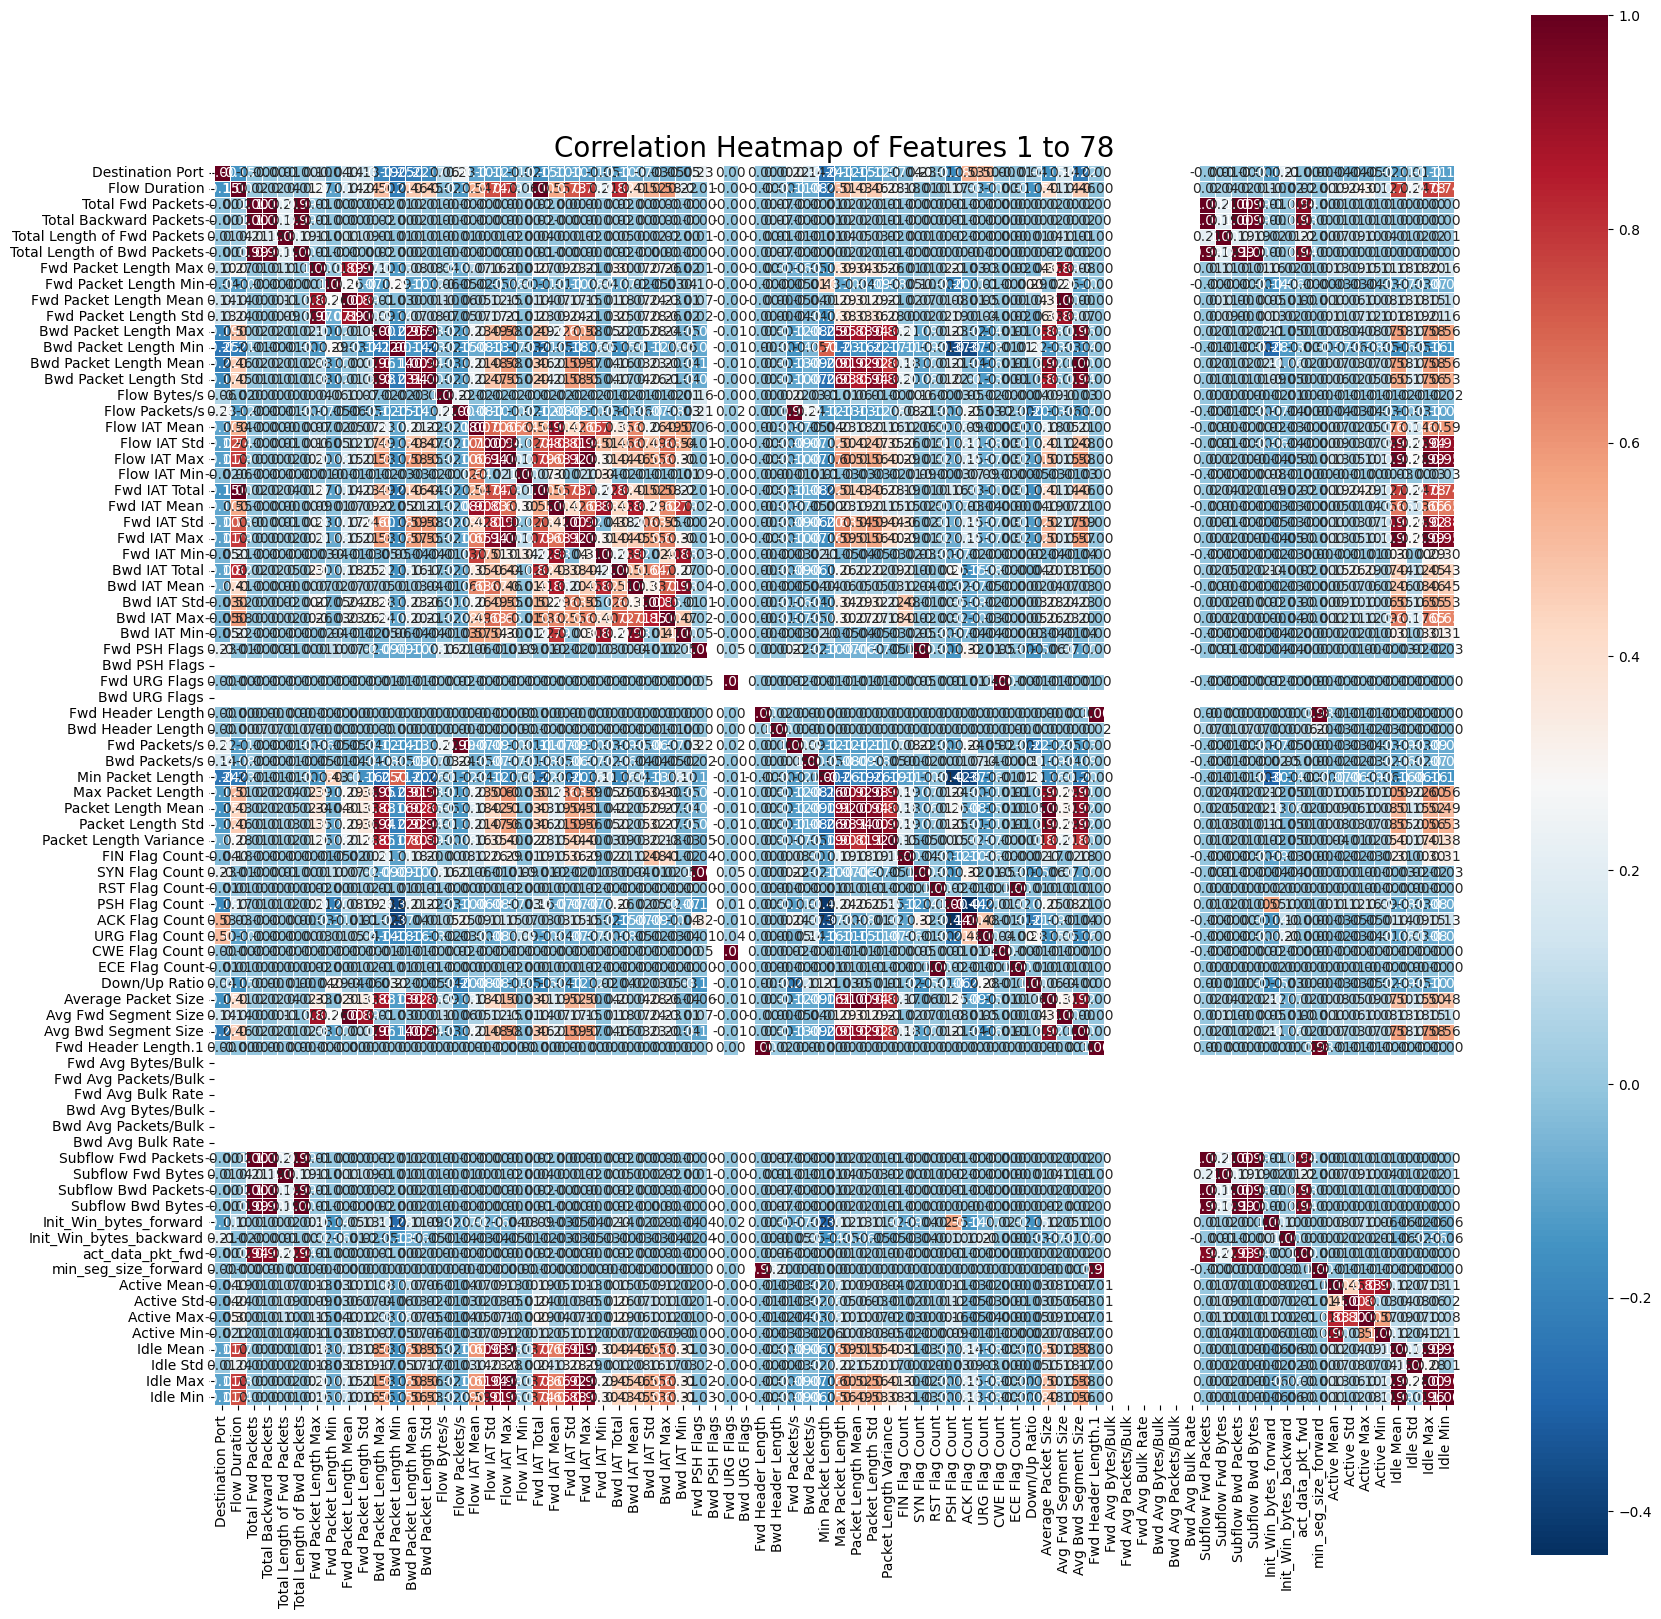

In [39]:
# Drop the 'Label' column
csv_concatenator_test_without_label = csv_concatenator_test.drop(["Label"], axis=1)

# Calculate the correlation matrix
corr = csv_concatenator_test_without_label.corr()

# Function to plot heatmap for a subset of features
def plot_heatmap(corr, start, end):
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr.iloc[start:end, start:end], cmap="RdBu_r", annot=True, fmt=".2f", linewidths=.5, square=True)
    plt.title(f'Correlation Heatmap of Features {start+1} to {end}', fontsize=20)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

# Define the number of features per heatmap
features_per_heatmap = 78

# Plot heatmaps in sections
for i in range(0, len(corr), features_per_heatmap):
    plot_heatmap(corr, i, min(i + features_per_heatmap, len(corr)))

### Testing Data pre-processing

In [40]:
Columns_to_drop = ['Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Label']
X_test = csv_concatenator_test.drop(columns=Columns_to_drop)
y_test = csv_concatenator_test['Label']

In [41]:
print(X_train.shape)

(2264594, 63)


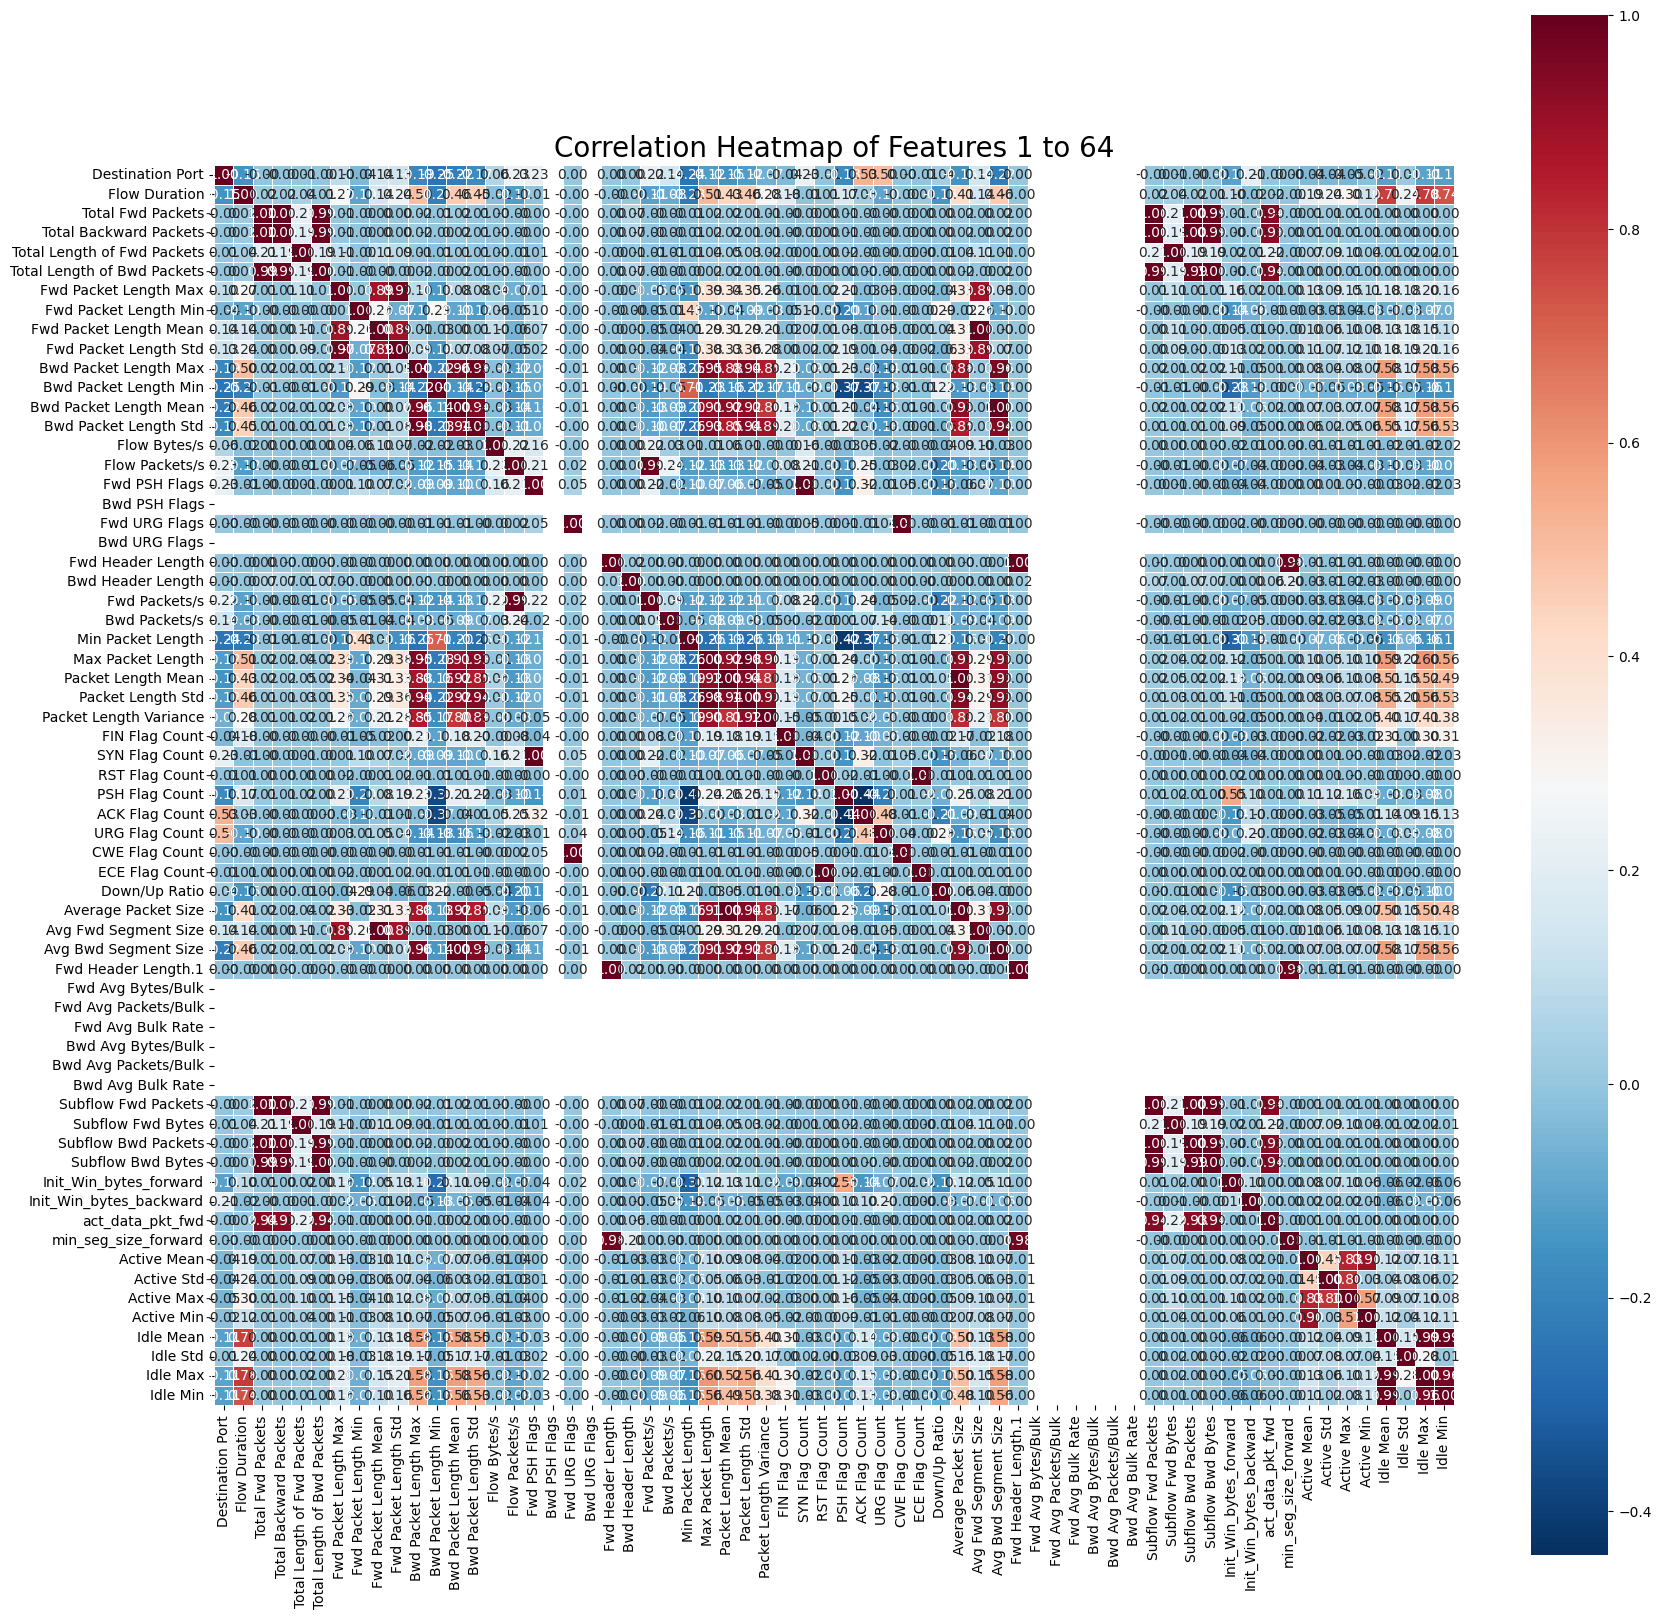

In [42]:
# Calculate the correlation matrix
corr = X_test.corr()

# Function to plot heatmap for a subset of features
def plot_heatmap(corr, start, end):
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr.iloc[start:end, start:end], cmap="RdBu_r", annot=True, fmt=".2f", linewidths=.5, square=True)
    plt.title(f'Correlation Heatmap of Features {start+1} to {end}', fontsize=20)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

# Define the number of features per heatmap
features_per_heatmap = 64

# Plot heatmaps in sections
for i in range(0, len(corr), features_per_heatmap):
    plot_heatmap(corr, i, min(i + features_per_heatmap, len(corr)))

### Testing Data Scalling

In [43]:
standard_scaler_test = StandardScaler()
label_encoder_test = LabelEncoder()

In [44]:
# Replace infinity values with NaN
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
X_test.fillna(X_test.mean(), inplace=True)

In [45]:
X_test_scaled = standard_scaler_test.fit_transform(X_test)
print("StandardScaler applied successfully.")

StandardScaler applied successfully.


### Label Encoding for Testing Data

In [46]:
# y is your categorical labels
y_encoded_test = label_encoder_test.fit_transform(y_test)

print("Original Classes: ", label_encoder_test.classes_, "\n")
print("Encoded test shape:", y_encoded_test.shape, "\n")

unique_classes_test = np.unique(y_encoded_test)
num_classes = len(unique_classes_test)

print("Classes: ", unique_classes_test)
print("Number of Classes: ", num_classes, "\n")

# Print unique encoded labels with their corresponding original classes
unique_encoded_labels = np.unique(y_encoded_test)
print("Unique Encoded Labels and their Original Classes:")
for encoded_label in unique_encoded_labels:
    original_class = label_encoder.inverse_transform([encoded_label])
    print(f"Encoded Label: {encoded_label}, Original Class: {original_class[0]}")

Original Classes:  ['BENIGN' 'Bot' 'Brute Force' 'DDoS' 'DoS GoldenEye' 'DoS Hulk'
 'DoS Slowhttptest' 'DoS slowloris' 'FTP-Patator' 'Heartbleed'
 'Infiltration' 'PortScan' 'SSH-Patator' 'Sql Injection' 'XSS'] 

Encoded test shape: (566149,) 

Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Number of Classes:  15 

Unique Encoded Labels and their Original Classes:
Encoded Label: 0, Original Class: BENIGN
Encoded Label: 1, Original Class: Bot
Encoded Label: 2, Original Class: Brute Force
Encoded Label: 3, Original Class: DDoS
Encoded Label: 4, Original Class: DoS GoldenEye
Encoded Label: 5, Original Class: DoS Hulk
Encoded Label: 6, Original Class: DoS Slowhttptest
Encoded Label: 7, Original Class: DoS slowloris
Encoded Label: 8, Original Class: FTP-Patator
Encoded Label: 9, Original Class: Heartbleed
Encoded Label: 10, Original Class: Infiltration
Encoded Label: 11, Original Class: PortScan
Encoded Label: 12, Original Class: SSH-Patator
Encoded Label: 13, Original Class: Sql I

In [47]:
print(type(X_test), type(y_encoded_test))
y_encoded_test = pd.DataFrame(y_encoded_test)

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [48]:
y_encoded_test.columns = ["Label"]

In [49]:
y_encoded_test
print(y_encoded_test)

        Label
0           0
1           0
2           5
3           0
4           0
...       ...
566144      0
566145      0
566146      0
566147      0
566148     11

[566149 rows x 1 columns]


# Training ML Model

### 1 - Logistic Regression

In [50]:
# # Initialize the logistic regression model
# logreg = LogisticRegression()

# # Trainig Model Time
# start_time = time.time()
# logreg.fit(X_train_scaled, y_encoded_train)
# Logistic_regression_training_time = time.time() - start_time

# # Save the model
# joblib.dump(logreg, 'LR.pk1')
# # loaded_model = joblib.load('LR.pk1')

# # Prediction Time
# start_time = time.time()
# y_pred = logreg.predict(X_test_scaled)
# Logistic_regression_prediction_time = time.time() - start_time

# y_pred_prob = logreg.predict_proba(X_test_scaled)

In [51]:
loaded_model = joblib.load('LR.pk1')
# Prediction Time
start_time = time.time()
y_pred = loaded_model.predict(X_test_scaled)
Logistic_regression_prediction_time = time.time() - start_time

y_pred_prob = loaded_model.predict_proba(X_test_scaled)
print(y_pred)

[ 0  0  5 ...  0  0 11]


In [52]:
# Calculate metrics of Logistic Regression
logistic_accuracy = accuracy_score(y_encoded_test, y_pred)
logistic_balanced_accuracy = balanced_accuracy_score(y_encoded_test, y_pred)
logistic_auc = roc_auc_score(y_encoded_test, y_pred_prob, multi_class='ovr')
logistic_f1 = f1_score(y_encoded_test, y_pred, average='weighted')
logistic_precision = precision_score(y_encoded_test, y_pred, average='weighted', zero_division=0)
logistic_recall = recall_score(y_encoded_test, y_pred, average='weighted')

# print(f"Training time of Logistic Regression: {Logistic_regression_training_time:.4f}")
print(f"Prediction time of Logistic Regression: {Logistic_regression_prediction_time:.4f}")
print(f"Accuracy of Logistic Regression: {logistic_accuracy:.4f}")
print(f"Balanced Accuracy of Logistic Regression: {logistic_balanced_accuracy:.4f}")
print(f"AUC of Logistic Regression: {logistic_auc:.4f}")
print(f"F1-Score of Logistic Regression: {logistic_f1:.4f}")
print(f"Precision of Logistic Regression: {logistic_precision:.4f}")
print(f"Recall of Logistic Regression: {logistic_recall:.4f}")

Prediction time of Logistic Regression: 0.3090
Accuracy of Logistic Regression: 0.9589
Balanced Accuracy of Logistic Regression: 0.3955
AUC of Logistic Regression: 0.9444
F1-Score of Logistic Regression: 0.9564
Precision of Logistic Regression: 0.9566
Recall of Logistic Regression: 0.9589


### 2 - Decision Tree

In [53]:
# # Initialize the Decision Tree model
# Decision_tree = tree.DecisionTreeClassifier(criterion ="entropy")

# # Trainig Model Time
# start_time = time.time()
# Decision_tree.fit(X_train_scaled, y_encoded_train)
# Decision_tree_training_time = time.time() - start_time

# # Save the model
# joblib.dump(Decision_tree, 'Decision tree.pk1')
# #loaded_model = joblib.load('Decision tree.pk1')

# # Prediction Time
# start_time = time.time()
# y_pred = Decision_tree.predict(X_test_scaled)
# Decision_tree_prediction_time = time.time() - start_time

# y_pred_prob = Decision_tree.predict_proba(X_test_scaled)


In [54]:
loaded_model = joblib.load('Decision tree.pk1')
# Prediction Time
start_time = time.time()
y_pred = loaded_model.predict(X_test_scaled)
Decision_tree_prediction_time = time.time() - start_time

y_pred_prob = loaded_model.predict_proba(X_test_scaled)

In [55]:
# Calculate metrics of Decision Tree
DT_accuracy = accuracy_score(y_encoded_test, y_pred)
DT_balanced_accuracy = balanced_accuracy_score(y_encoded_test, y_pred)
DT_auc = roc_auc_score(y_encoded_test, y_pred_prob, multi_class='ovr')
DT_f1 = f1_score(y_encoded_test, y_pred, average='weighted')
DT_precision = precision_score(y_encoded_test, y_pred, average='weighted', zero_division=0)
DT_recall = recall_score(y_encoded_test, y_pred, average='weighted')

# print(f"Training time of Decision Tree: {Decision_tree_training_time:.4f}")
print(f"Prediction time of Decision Tree: {Decision_tree_prediction_time:.4f}")
print(f"Accuracy of Decision Tree: {DT_accuracy:.4f}")
print(f"Balanced Accuracy of Decision Tree: {DT_balanced_accuracy:.4f}")
print(f"AUC of Decision Tree: {DT_auc:.4f}")
print(f"F1-Score of Decision Tree: {DT_f1:.4f}")
print(f"Precision of Decision Tree: {DT_precision:.4f}")
print(f"Recall of Decision Tree: {DT_recall:.4f}")

Prediction time of Decision Tree: 0.2276
Accuracy of Decision Tree: 0.8881
Balanced Accuracy of Decision Tree: 0.2184
AUC of Decision Tree: 0.5943
F1-Score of Decision Tree: 0.8591
Precision of Decision Tree: 0.8927
Recall of Decision Tree: 0.8881


### 3 - Random Forest

In [56]:
# # Initialize the Random Forest model
# Random_Forest = RandomForestClassifier() 

# # Trainig Model Time
# start_time = time.time()
# Random_Forest.fit(X_train_scaled, y_encoded_train)
# Random_Forest_training_time = time.time() - start_time

# # Save the model
# joblib.dump(Random_Forest, 'Random Forest.pk1')
# #loaded_model = joblib.load('Random Forest.pk1')

# # Prediction Time
# start_time = time.time()
# y_pred = Random_Forest.predict(X_test_scaled)
# Random_Forest_prediction_time = time.time() - start_time

# y_pred_prob = Random_Forest.predict_proba(X_test_scaled)

In [57]:
loaded_model = joblib.load('Random Forest.pk1')

# Prediction Time
start_time = time.time()
y_pred = loaded_model.predict(X_test_scaled)
Random_Forest_prediction_time = time.time() - start_time

y_pred_prob = loaded_model.predict_proba(X_test_scaled)

In [58]:
# Calculate metrics of Random Forest
RF_accuracy = accuracy_score(y_encoded_test, y_pred)
RF_balanced_accuracy = balanced_accuracy_score(y_encoded_test, y_pred)
RF_auc = roc_auc_score(y_encoded_test, y_pred_prob, multi_class='ovr')
RF_f1 = f1_score(y_encoded_test, y_pred, average='weighted')
RF_precision = precision_score(y_encoded_test, y_pred, average='weighted', zero_division=0)
RF_recall = recall_score(y_encoded_test, y_pred, average='weighted')

# print(f"Training time of Random Forest: {Random_Forest_training_time:.4f}")
print(f"Prediction time of Random Forest: {Random_Forest_prediction_time:.4f}")
print(f"Accuracy of Random Forest: {RF_accuracy:.4f}")
print(f"Balanced Accuracy of Random Forest: {RF_balanced_accuracy:.4f}")
print(f"AUC of Random Forest: {RF_auc:.4f}")
print(f"F1-Score of Random Forest: {RF_f1:.4f}")
print(f"Precision of Random Forest: {RF_precision:.4f}")
print(f"Recall of Random Forest: {RF_recall:.4f}")

Prediction time of Random Forest: 8.0118
Accuracy of Random Forest: 0.8569
Balanced Accuracy of Random Forest: 0.2632
AUC of Random Forest: 0.9077
F1-Score of Random Forest: 0.8060
Precision of Random Forest: 0.8217
Recall of Random Forest: 0.8569


### 4 - Support Vector Machine

In [ ]:
# Initialize the Support Vector Machine model
SVM = SVC(probability=True)

# Trainig Model Time
start_time = time.time()
SVM.fit(X_train_scaled, y_encoded_train)
SVM_training_time = time.time() - start_time

# Save the model
joblib.dump(SVM, 'SVM.pk1')
#loaded_model = joblib.load('SVM.pk1')

# Prediction Time
start_time = time.time()
y_pred = SVM.predict(X_test_scaled)
SVM_prediction_time = time.time() - start_time

y_pred_prob = SVM.predict_proba(X_test_scaled)

In [ ]:
# Calculate metrics of Support Vector Machine
SVM_accuracy = accuracy_score(y_encoded_test, y_pred)
SVM_balanced_accuracy = balanced_accuracy_score(y_encoded_test, y_pred)
SVM_auc = roc_auc_score(y_encoded_test, y_pred_prob, multi_class='ovr')
SVM_f1 = f1_score(y_encoded_test, y_pred, average='weighted')
SVM_precision = precision_score(y_encoded_test, y_pred, average='weighted', zero_division=0)
SVM_recall = recall_score(y_encoded_test, y_pred, average='weighted')

print(f"Training time of Support Vector Machine: {SVM_training_time:.4f}")
print(f"Prediction time of Support Vector Machine: {SVM_prediction_time:.4f}")
print(f"Accuracy of Support Vector Machine: {SVM_accuracy:.4f}")
print(f"Balanced Accuracy of Support Vector Machine: {SVM_balanced_accuracy:.4f}")
print(f"AUC of Support Vector Machine: {SVM_auc:.4f}")
print(f"F1-Score of Support Vector Machine: {SVM_f1:.4f}")
print(f"Precision of Support Vector Machine: {SVM_precision:.4f}")
print(f"Recall of Support Vector Machine: {SVM_recall:.4f}")

### 5 - K-Nearest Neighbour

In [ ]:
# # Initialize the Support Vector Machine model
# KNN = KNeighborsClassifier(n_neighbors=3) 

# # Trainig Model Time
# start_time = time.time()
# KNN.fit(X_train_scaled, y_encoded_train)
# KNN_training_time = time.time() - start_time

# # Save the model
# joblib.dump(KNN, 'KNN.pk1')
# #loaded_model = joblib.load('KNN.pk1')

# # Prediction Time
# start_time = time.time()
# y_pred = KNN.predict(X_test_scaled)
# KNN_prediction_time = time.time() - start_time

# y_pred_prob = KNN.predict_proba(X_test_scaled)

In [ ]:
#load the model
loaded_model = joblib.load('KNN.pk1')

# Prediction Time
start_time = time.time()
y_pred = loaded_model.predict(X_test_scaled)
KNN_prediction_time = time.time() - start_time

y_pred_prob = loaded_model.predict_proba(X_test_scaled)

In [94]:
# Calculate metrics of K-Nearest Neighbour
KNN_accuracy = accuracy_score(y_encoded_test, y_pred)
KNN_balanced_accuracy = balanced_accuracy_score(y_encoded_test, y_pred)
KNN_auc = roc_auc_score(y_encoded_test, y_pred_prob, multi_class='ovr')
KNN_f1 = f1_score(y_encoded_test, y_pred, average='weighted')
KNN_precision = precision_score(y_encoded_test, y_pred, average='weighted', zero_division=0)
KNN_recall = recall_score(y_encoded_test, y_pred, average='weighted')

# print(f"Training time of K-Nearest Neighbour: {KNN_training_time:.4f}")
print(f"Prediction time of K-Nearest Neighbour: {KNN_prediction_time:.4f}")
print(f"Accuracy of Support K-Nearest Neighbour: {KNN_accuracy:.4f}")
print(f"Balanced Accuracy of K-Nearest Neighbour: {KNN_balanced_accuracy:.4f}")
print(f"AUC of K-Nearest Neighbour: {KNN_auc:.4f}")
print(f"F1-Score of K-Nearest Neighbour: {KNN_f1:.4f}")
print(f"Precision of K-Nearest Neighbour: {KNN_precision:.4f}")
print(f"Recall of K-Nearest Neighbour: {KNN_recall:.4f}")

Training time of K-Nearest Neighbour: 4.4452
Prediction time of K-Nearest Neighbour: 495.8506
Accuracy of Support K-Nearest Neighbour: 1.0000
Balanced Accuracy of K-Nearest Neighbour: 1.0000
AUC of K-Nearest Neighbour: 1.0000
F1-Score of K-Nearest Neighbour: 1.0000
Precision of K-Nearest Neighbour: 1.0000
Recall of K-Nearest Neighbour: 1.0000


In [95]:
evaluation_metrics = ["Accuracy", "Balanced Accuracy", "Training Time", "Testing Time", "AUC", "F1-Score", "Precision", "Recall"]
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN"]

df = pd.DataFrame(index=models, columns=evaluation_metrics)

df.loc["Logistic Regression"] = [f"{logistic_accuracy:.4f}", f"{logistic_balanced_accuracy:.4f}", f"{Logistic_regression_training_time:.4f}", f"{Logistic_regression_prediction_time:.4f}", f"{logistic_auc:.4f}", f"{logistic_f1:.4f}", f"{logistic_precision:.4f}", f"{logistic_recall:.4f}"]
df.loc["Decision Tree"] = [f"{DT_accuracy:.4f}", f"{DT_balanced_accuracy:.4f}", f"{Decision_tree_training_time:.4f}", f"{Decision_tree_prediction_time:.4f}", f"{DT_auc:.4f}", f"{DT_f1:.4f}", f"{DT_precision:.4f}", f"{DT_recall:.4f}"]
df.loc["Random Forest"] = [f"{RF_accuracy:.4f}", f"{RF_balanced_accuracy:.4f}", f"{Random_Forest_training_time:.4f}", f"{Random_Forest_prediction_time:.4f}", f"{RF_auc:.4f}", f"{RF_f1:.4f}", f"{RF_precision:.4f}", f"{RF_recall:.4f}"]
df.loc["SVM"] = [f"{SVM_accuracy:.4f}", f"{SVM_balanced_accuracy:.4f}", f"{SVM_training_time:.4f}", f"{SVM_prediction_time:.4f}", f"{SVM_auc:.4f}", f"{SVM_f1:.4f}", f"{SVM_precision:.4f}", f"{SVM_recall:.4f}"]
df.loc["KNN"] = [f"{KNN_accuracy:.4f}", f"{KNN_balanced_accuracy:.4f}", f"{KNN_training_time:.4f}", f"{KNN_prediction_time:.4f}", f"{KNN_auc:.4f}", f"{KNN_f1:.4f}", f"{KNN_precision:.4f}", f"{KNN_recall:.4f}"]


df.to_excel(r"D:\CSE Batch58\4th year\1st term\1st term\1. Machine Learning\10. Project\Final Project\Model Evaluations\model_evaluation_metricies.xlsx")